# 逻辑回归
逻辑回归为线性分类器，
对数几率分布公式：

$P(Y=1|X=x)={\frac  {e^{{x'\beta }}}{1+e^{{x'\beta }}}}$

其中$\beta$常用极大似然估计.
具体细节见知乎：[逻辑回归](https://zhuanlan.zhihu.com/p/74874291)

python实现：

You can use scikit-learn to perform various functions:

- Preprocess data
- Reduce the dimensionality of problems
- Validate models
- Select the most appropriate model
- Solve regression and classification problems
- Implement cluster analysis

In [1]:
# 1.导入相关包
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 2.获取数据 这里以二分类为例子
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x)
print(y)


[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [4]:
# 3.创建模型进行训练
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x, y)
print(model)
print(model.classes_)
print(model.intercept_)
print(model.coef_)


LogisticRegression(random_state=0, solver='liblinear')
[0 1]
[-1.04608067]
[[0.51491375]]


In [9]:
# 4.评估模型
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))  # 准确率

print(classification_report(y, model.predict(x)))


[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]
[0 0 0 1 1 1 1 1 1 1]
0.9
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



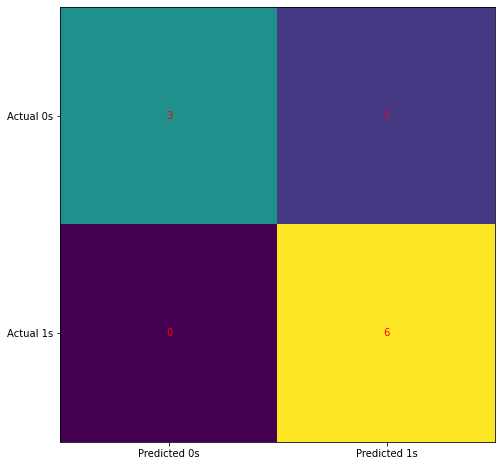

In [8]:
# 使用混淆矩阵来生成TP、FP、TN、FN的指标
#       p
# t   TN FP
#     FN TP
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [10]:
# 模型优化：通过修改不同的参数来对训练数据进行拟合
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
print(model.predict(x))


[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]


例2：

标签进行更改,通过下列代码，可以看出这一批数据是属于线性不可分的。因此，不能找出一个合适的决策边界，来将两类数据进行合理的划分。

In [ ]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [ ]:
print('x:', x, sep='\n')
print('y:', y, sep='\n', end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('report:', report, sep='\n')

使用`statsmodels`来完成逻辑回归

In [11]:
# 1. import
import numpy as np
import statsmodels.api as sm

# 2. get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)  # statsmodels需要手动添加偏差项
print(x)
print(y)

# 3. model and train
model = sm.Logit(y, x)
result = model.fit(method='newton')
print(result.params)  # 回归参数

# 4. Evaluate
print(result.predict(x))
print((result.predict(x) >= 0.5).astype(int))
print(result.pred_table())  # confusion matrix
print(result.summary())
result.summary2()

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
[0 1 0 0 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7
[-1.972805    0.82240094]
[0.12208792 0.24041529 0.41872657 0.62114189 0.78864861 0.89465521
 0.95080891 0.97777369 0.99011108 0.99563083]
[0 0 0 1 1 1 1 1 1 1]
[[2. 1.]
 [1. 6.]]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                  0.4263
Time:                        11:10:49   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2021-06-10 11:10 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

手写数字识别

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# get data
x, y = load_digits(return_X_y=True)
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 数据标准化， 减均值除标准差
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# 训练
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

# 评估
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
0.964509394572025
0.9416666666666667


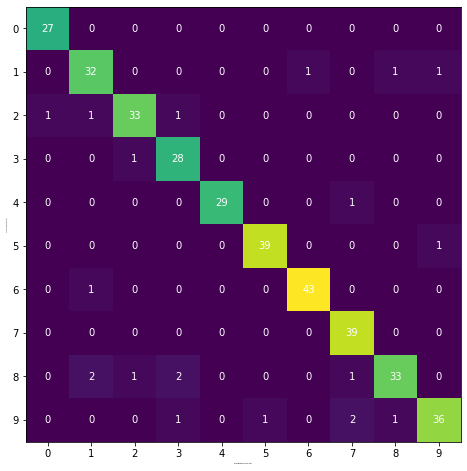

In [19]:
cm = confusion_matrix(y_test, y_pred)
font_size = 2
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

